In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
# Генерация временного ряда
def generate_time_series():
    t = np.arange(0, 30, 0.1)
    y = 0.1 * t ** 2 + 0.5 * t + 0.1
    np.random.randn(len(t))
    return y

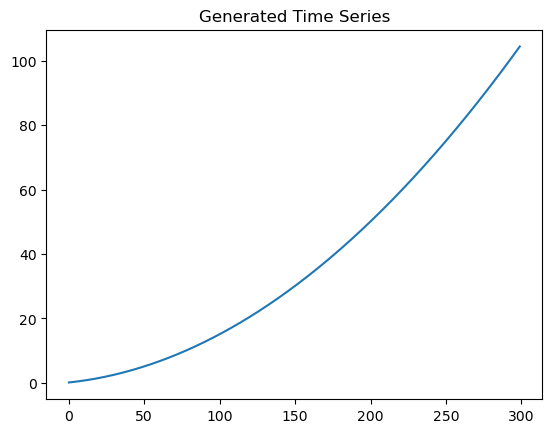

In [3]:
# Создание и визуализация временного ряда
time_series = generate_time_series()

plt.plot(time_series)
plt.title('Generated Time Series')
plt.show()

In [4]:
# Подготовка данных для LSTM
def prepare_data(time_series, n_steps):
    X, y = [], []
    for i in range(len(time_series) - n_steps):
        X.append(time_series[i:i+n_steps])
        y.append(time_series[i+n_steps])
    return np.array(X), np.array(y)

In [5]:
n_steps = 10
X, y = prepare_data(time_series, n_steps)

# Разворачиваем данные для LSTM
X = X.reshape((X.shape[0], X.shape[1], 1))

# Создание модели LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Обучение модели
model.fit(X, y, epochs=50, verbose=1)

Epoch 1/50
10/10 [==============================] - 1s 30ms/step - loss: 1644.3063
Epoch 2/50
10/10 [==============================] - 0s 27ms/step - loss: 402.9943
Epoch 3/50
10/10 [==============================] - 0s 26ms/step - loss: 57.7833
Epoch 4/50
10/10 [==============================] - 0s 29ms/step - loss: 15.7491
Epoch 5/50
10/10 [==============================] - 0s 27ms/step - loss: 4.2046
Epoch 6/50
10/10 [==============================] - 0s 29ms/step - loss: 1.4451
Epoch 7/50
10/10 [==============================] - 0s 28ms/step - loss: 0.9531
Epoch 8/50
10/10 [==============================] - 0s 28ms/step - loss: 0.6239
Epoch 9/50
10/10 [==============================] - 0s 31ms/step - loss: 0.3182
Epoch 10/50
10/10 [==============================] - 0s 27ms/step - loss: 0.1665
Epoch 11/50
10/10 [==============================] - 0s 32ms/step - loss: 0.0950
Epoch 12/50
10/10 [==============================] - 0s 30ms/step - loss: 0.0586
Epoch 13/50
10/10 [===========

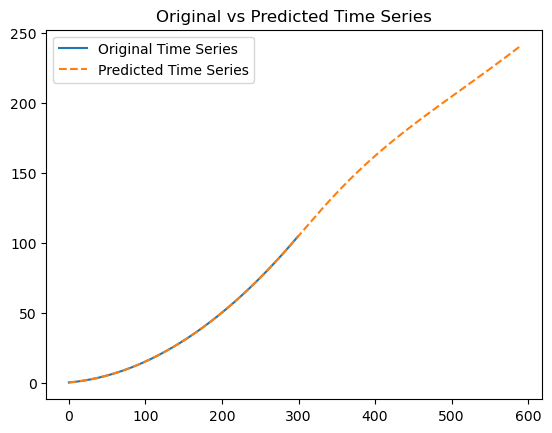

In [6]:
# Генерация нового временного ряда с использованием обученной модели
def generate_new_time_series(model, time_series, n_steps):
    series = time_series.copy()
    for _ in range(len(time_series) - n_steps):
        X_new = series[-n_steps:].reshape((1, n_steps, 1))
        y_pred = model.predict(X_new)
        series = np.append(series, y_pred)
    return series

# Генерация нового временного ряда
new_time_series = generate_new_time_series(model, time_series, n_steps)

# Визуализация оригинального и предсказанного временных рядов
plt.plot(time_series, label='Original Time Series')
plt.plot(new_time_series, label='Predicted Time Series', linestyle='dashed')
plt.title('Original vs Predicted Time Series')
plt.legend()
plt.show()